In [1]:
%pip install icecream

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic
print=ic

# for von-misses stresses
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm


## MESH and CONNECTIVITY

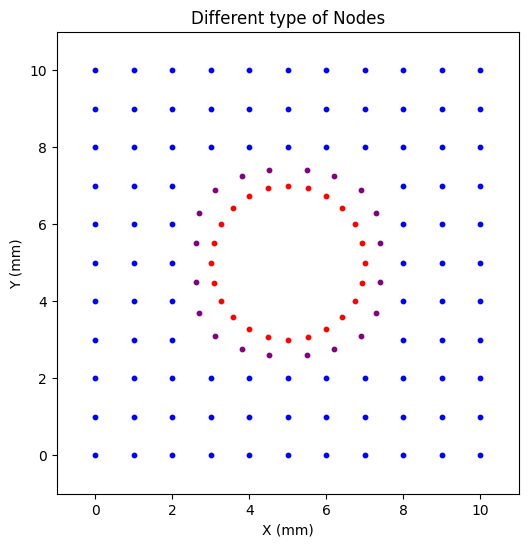

In [3]:
## Node generation

def generate_structured_points_with_hole(rect_size, hole_size, spacing):
    """
    Generate structured points inside a rectangle with a square hole at the center.

    Parameters:
    - rect_size: tuple, dimensions of the rectangle (width, height) in mm
    - hole_size: tuple, dimensions of the square hole (width, height) in mm
    - spacing: float, distance between points in mm

    Returns:
    - points: numpy array of shape (N, 2), points inside the area excluding the hole
    """
    width, height = rect_size
    hole_width, hole_height = hole_size

    # Define the hole's bounds
    hole_x_min = (width - hole_width) / 2
    hole_x_max = (width + hole_width) / 2
    hole_y_min = (height - hole_height) / 2
    hole_y_max = (height + hole_height) / 2

    # Generate structured grid points
    x_coords = np.arange(0, width + spacing, spacing)
    y_coords = np.arange(0, height + spacing, spacing)
    grid_x, grid_y = np.meshgrid(x_coords, y_coords)
    points = np.column_stack((grid_x.ravel(), grid_y.ravel()))

    # Filter out points inside the hole
    mask = ~((hole_x_min <= points[:, 0]) & (points[:, 0] <= hole_x_max) &
             (hole_y_min <= points[:, 1]) & (points[:, 1] <= hole_y_max))

    return points[mask]

def generate_hole_perimeter_points(rect_size, hole_radius, num_nodes_on_perimeter):
    """
    Generate a grid of points with nodes on the perimeter of a hole inside the rectangle.

    Parameters:
    - rect_size: tuple, dimensions of the rectangle (width, height) in mm
    - hole_radius: float, radius of the circular hole in mm
    - num_nodes_on_perimeter: int, number of nodes on the perimeter of the hole

    Returns:
    - points: numpy array of shape (N, 2), points in the grid with nodes on the hole's perimeter
    """
    width, height = rect_size
    # Define the center of the hole
    hole_center = (width / 2, height / 2)

    # Generate a grid of points within the rectangle
    x_coords = np.arange(0, width, 1)
    y_coords = np.arange(0, height, 1)
    grid_x, grid_y = np.meshgrid(x_coords, y_coords)
    grid_points = np.column_stack((grid_x.ravel(), grid_y.ravel()))

    # Generate nodes on the perimeter of the hole
    angles = np.linspace(0, 2 * np.pi, num_nodes_on_perimeter, endpoint=False)
    hole_x = hole_center[0] + hole_radius * np.cos(angles)
    hole_y = hole_center[1] + hole_radius * np.sin(angles)
    hole_points = np.column_stack((hole_x, hole_y))


    return hole_points

def mirror_points(points, x_mirror, y_mirror):
    mirrored_points = []

    for point in points:
        x, y = point

        # Mirror about x = 5
        mirrored_x = 2 * x_mirror - x

        # Mirror about y = 5
        mirrored_y = 2 * y_mirror - y

        mirrored_points.append([mirrored_x, mirrored_y])
        mirrored_points.append([x, mirrored_y])
        mirrored_points.append([mirrored_x, y])

    return np.array(mirrored_points)

# Parameters
rect_size = (10, 10)
hole_size = (5.9, 5.9)
spacing = 1

structured_nodes = generate_structured_points_with_hole(rect_size, hole_size, spacing)

hole_radius = 2
num_nodes_on_perimeter = 24
hole_perimeter_nodes = generate_hole_perimeter_points(rect_size, hole_radius, num_nodes_on_perimeter)

unstructured_nodes = np.array([
    [2.6,4.5],
    [2.7,3.7],
    [3.1,3.1],
    [3.8,2.75],
    [4.5,2.6],
])


# Create mirrored points
mirrored_points = mirror_points(unstructured_nodes, x_mirror = 5, y_mirror = 5)
unstructured_nodes = np.vstack((unstructured_nodes, mirrored_points))

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(structured_nodes[:, 0], structured_nodes[:, 1], s=10, color='blue', label='Valid Points')
plt.scatter(hole_perimeter_nodes[:, 0], hole_perimeter_nodes[:, 1], s=10, color='red', label='Nodes on Hole Perimeter')

plt.scatter(unstructured_nodes[:, 0], unstructured_nodes[:, 1], s=10, color='purple', label='Unstructured Nodes')


#plt.gca().add_patch(plt.Circle((rect_size[0]/2, rect_size[1]/2), hole_radius, color='red', alpha=0.3, label='Hole'))
plt.xlim(-1, 11)
plt.ylim(-1, 11)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.title('Different type of Nodes')
# plt.legend()
plt.show()

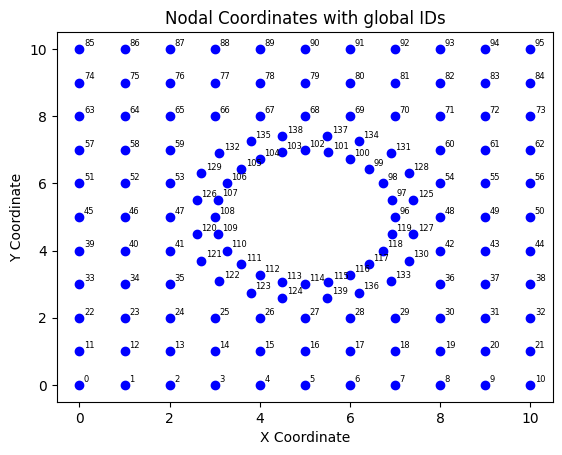

In [4]:
nodal_coordinates = np.vstack((structured_nodes, hole_perimeter_nodes, unstructured_nodes))

x_coords, y_coords = zip(*nodal_coordinates)
plt.scatter(x_coords, y_coords, color='blue')

for i, (x, y) in enumerate(nodal_coordinates):
    plt.text(x + 0.1, y + 0.1, f'{i}', fontsize=6)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Nodal Coordinates with global IDs')

plt.show()

ic| f"num of elements {connectivity.shape[0]}": 'num of elements 108'


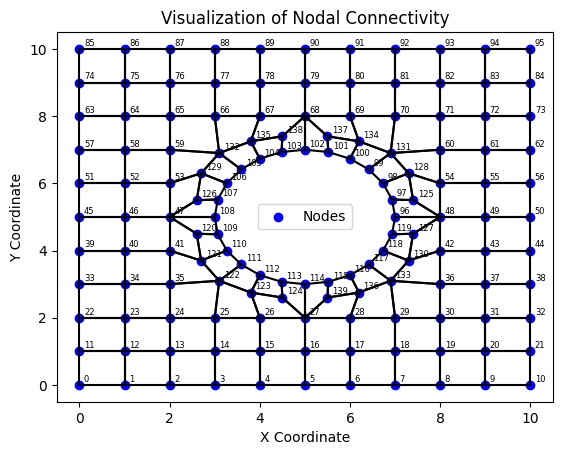

In [5]:
connectivity = [
    [0,1,12,11],
    [1,2,13,12],
    [2,3,14,13],
    [3,4,15,14],
    [4,5,16,15],
    [5,6,17,16],
    [6,7,18,17],
    [7,8,19,18],
    [8,9,20,19],
    [9,10,21,20],
    [11,12,23,22],
    [12,13,24,23],
    [13,14,25,24],
    [14,15,26,25],
    [15,16,27,26],
    [16,17,28,27],
    [17,18,29,28],
    [18,19,30,29],
    [19,20,31,30],
    [20,21,32,31],
    [22,23,34,33],
    [23,24,35,34],


    [33,34,40,39],
    [34,35,41,40],
    [39,40,46,45],
    [40,41,47,46],
    [45,46,52,51],
    [46,47,53,52],
    [51,52,58,57],
    [52,53,59,58],
    [57,58,64,63],
    [58,59,65,64],
    [30,31,37,36],
    [31,32,38,37],
    [36,37,43,42],
    [37,38,44,43],
    [42,43,49,48],
    [43,44,50,49],
    [48,49,55,54],
    [49,50,56,55],
    [54,55,61,60],
    [55,56,62,61],
    [60,61,72,71],
    [61,62,73,72],

    [63,64,75,74],
    [64,65,76,75],
    [65,66,77,76],
    [66,67,78,77],
    [67,68,79,78],
    [68,69,80,79],
    [69,70,81,80],
    [70,71,82,81],
    [71,72,83,82],
    [72,73,84,83],
    [74,75,86,85],
    [75,76,87,86],
    [76,77,88,87],
    [77,78,89,88],
    [78,79,90,89],
    [79,80,91,90],
    [80,81,92,91],
    [81,82,93,92],
    [82,83,94,93],
    [83,84,95,94],

    [24,25,122,35],
    [25,26,123,122],
    [26,27,124,123],
    [124,27,114,113],
    [35,122,121,41],
    [121,122,111,110],
    [122,123,112,111],
    [123,124,113,112],
    [41,121,120,47],
    [121,110,109,120],
    [47,120,109,108],
    [27,139,115,114],
    [27,28,136,139],
    [139,136,116,115],
    [28,29,133,136],
    [29,30,36,133],
    [133,36,42,130],
    [136,133,117,116],
    [133,130,118,117],
    [48,96,119,127],
    [118,130,127,119],
    [130,42,48,127],
    [96,48,125,97],
    [125,48,54,128],
    [131,60,71,70],
    [128,54,60,131],
    [98,128,131,99],
    [100,99,131,134],
    [97,125,128,98],
    [134,131,70,69],
    [68,102,101,137],
    [101,100,134,137],
    [137,134,69,68],
    [47,108,107,126],
    [47,126,129,53],
    [126,107,106,129],
    [59,132,66,65],
    [53,129,132,59],
    [129,106,105,132],
    [132,135,67,66],
    [105,104,135,132],
    [104,103,138,135],
    [135,138,68,67],
    [103,102,68,138]
] # N_elemsx4

connectivity = np.array(connectivity)

print(f"num of elements {connectivity.shape[0]}") # correct


# Plot the nodal coordinates
x_coords, y_coords = zip(*nodal_coordinates)
plt.scatter(x_coords, y_coords, color='blue', label='Nodes')

for i, (x, y) in enumerate(nodal_coordinates):
    plt.text(x + 0.1, y + 0.1, f'{i}', fontsize=6)

# Plot the connectivity (lines between connected nodes)
for row in connectivity:
    nodes = row  # Get the 4 connected nodes

    node0 = nodal_coordinates[nodes[0]]
    node1 = nodal_coordinates[nodes[1]]
    node2 = nodal_coordinates[nodes[2]]
    node3 = nodal_coordinates[nodes[3]]

    plt.plot([node0[0], node1[0]], [node0[1], node1[1]], color='black')
    plt.plot([node1[0], node2[0]], [node1[1], node2[1]], color='black')
    plt.plot([node2[0], node3[0]], [node2[1], node3[1]], color='black')
    plt.plot([node3[0], node0[0]], [node3[1], node0[1]], color='black')


# Set plot labels and title
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Visualization of Nodal Connectivity')

# Display the plot
plt.legend()
plt.show()


## ELEMENTS, SYSTEM, SOLVER and PLOTTER

In [73]:
class NonlinearElement2D:
    def  __init__(self, node_indeces, node_coordinates):
        self.node_indeces = node_indeces
        self.node_coordinates = node_coordinates

        lamb = 1
        mu = 0.5

        # # plain strain assumption
        # self.C = np.array([
        #     [lamb+2*mu, lamb, 0],
        #     [lamb, lamb+2*mu, 0],
        #     [0,0,mu]])

        # plain stress assumption
        self.C = np.array([
            [4*mu*(mu+lamb), 2*mu*lamb, 0],
            [2*mu*lamb, 4*mu*(mu+lamb), 0],
            [0,0,lamb*mu + 2*mu**2]
        ]) / (lamb + 2*mu)



        self.K_elem_global = self.get_local_stiffness_matrix() # local isn't actually local, it is in parametric square space in range [-1, 1] for both x and y

    def get_global_stiffness_matrix(self):
        return self.get_local_stiffness_matrix()

    def get_local_stiffness_matrix(self):
        self.k_elem_local = np.zeros([len(self.node_indeces)*2, len(self.node_indeces)*2]) # 8x8
        self.gauss_quadrature_points = [
            [-1/np.sqrt(3), -1/np.sqrt(3)],
            [+1/np.sqrt(3), -1/np.sqrt(3)],
            [+1/np.sqrt(3), +1/np.sqrt(3)],
            [-1/np.sqrt(3), +1/np.sqrt(3)],
            ]
        self.gauss_quadrature_weights = [1,1,1,1]

        for i, (ksi1_g, ksi2_g) in enumerate(self.gauss_quadrature_points):
            B = self.get_B(ksi1_g, ksi2_g)
            wk = self.gauss_quadrature_weights[i]
            j = np.linalg.det(self.get_jacobian(ksi1_g, ksi2_g))
            self.k_elem_local += B.T @ self.C @ B * j * wk

        return self.k_elem_local

    def get_B(self, ksi1_g, ksi2_g):
        J = self.get_jacobian(ksi1_g, ksi2_g)
        J_inv = np.linalg.inv(J)
        J_inv[J_inv == 0] = 1e-12

        # B_{parameter_index}_{shape_function}
        B11 = dN1_ksi1(ksi1_g, ksi2_g) * J_inv[0][0] + dN1_ksi2(ksi1_g, ksi2_g) * J_inv[1][0]
        B12 = dN2_ksi1(ksi1_g, ksi2_g) * J_inv[0][0] + dN2_ksi2(ksi1_g, ksi2_g) * J_inv[1][0]
        B13 = dN3_ksi1(ksi1_g, ksi2_g) * J_inv[0][0] + dN3_ksi2(ksi1_g, ksi2_g) * J_inv[1][0]
        B14 = dN4_ksi1(ksi1_g, ksi2_g) * J_inv[0][0] + dN4_ksi2(ksi1_g, ksi2_g) * J_inv[1][0]

        B21 = dN1_ksi1(ksi1_g, ksi2_g) * J_inv[0][1] + dN1_ksi2(ksi1_g, ksi2_g) * J_inv[1][1]
        B22 = dN2_ksi1(ksi1_g, ksi2_g) * J_inv[0][1] + dN2_ksi2(ksi1_g, ksi2_g) * J_inv[1][1]
        B23 = dN3_ksi1(ksi1_g, ksi2_g) * J_inv[0][1] + dN3_ksi2(ksi1_g, ksi2_g) * J_inv[1][1]
        B24 = dN4_ksi1(ksi1_g, ksi2_g) * J_inv[0][1] + dN4_ksi2(ksi1_g, ksi2_g) * J_inv[1][1]

        B = np.array([
            [B11, 0, B12, 0, B13, 0, B14, 0],
            [0, B21, 0, B22, 0, B23, 0, B24],
            [B21, B11, B22, B12, B23, B13, B24, B14]
        ])

        return B


    def get_jacobian(self, ksi1, ksi2):
        XY = self.node_coordinates

        X = XY[:,0]; Y = XY[:,1]

        J11 = dN1_ksi1(ksi1, ksi2) * X[0] + dN2_ksi1(ksi1, ksi2) * X[1] + dN3_ksi1(ksi1, ksi2) * X[2] + dN4_ksi1(ksi1, ksi2) * X[3]
        J12 = dN1_ksi2(ksi1, ksi2) * X[0] + dN2_ksi2(ksi1, ksi2) * X[1] + dN3_ksi2(ksi1, ksi2) * X[2] + dN4_ksi2(ksi1, ksi2) * X[3]
        J21 = dN1_ksi1(ksi1, ksi2) * Y[0] + dN2_ksi1(ksi1, ksi2) * Y[1] + dN3_ksi1(ksi1, ksi2) * Y[2] + dN4_ksi1(ksi1, ksi2) * Y[3]
        J22 = dN1_ksi2(ksi1, ksi2) * Y[0] + dN2_ksi2(ksi1, ksi2) * Y[1] + dN3_ksi2(ksi1, ksi2) * Y[2] + dN4_ksi2(ksi1, ksi2) * Y[3]

        self.J = np.array([[J11, J12], [J21, J22]])
        return self.J

## utils
# shape functions
def N1(ksi1, ksi2): return 1/4 * (1-ksi1)*(1-ksi2)
def N2(ksi1, ksi2): return 1/4 * (1+ksi1)*(1-ksi2)
def N3(ksi1, ksi2): return 1/4 * (1+ksi1)*(1+ksi2)
def N4(ksi1, ksi2): return 1/4 * (1-ksi1)*(1+ksi2)

# derivatives of shape functions
def dN1_ksi1(ksi1, ksi2): return -1/4 * (1-ksi2)
def dN1_ksi2(ksi1, ksi2): return -1/4 * (1-ksi1)
def dN2_ksi1(ksi1, ksi2): return 1/4 * (1-ksi2)
def dN2_ksi2(ksi1, ksi2): return -1/4 * (1+ksi1)
def dN3_ksi1(ksi1, ksi2): return 1/4 * (1+ksi2)
def dN3_ksi2(ksi1, ksi2): return 1/4 * (1+ksi1)
def dN4_ksi1(ksi1, ksi2): return -1/4 * (1+ksi2)
def dN4_ksi2(ksi1, ksi2): return 1/4 * (1-ksi1)


In [74]:
class NonlinearSystem2D:
    def __init__(self, elements, num_nodes, forces, boundary_conditions):
        self.elements = elements
        self.num_nodes = num_nodes
        self.forces = forces
        self.boundary_conditions = boundary_conditions

In [91]:
class Solver:
    def __init__(self, system):
        self.system = system

    def solve(self):
        K_global, F_global = self.assemble_global_matrices()
        Kuu, Fu = self.apply_boundary_conditions()
        displacements = self.solve_displacements()
        reaction_forces = self.get_reaction_forces()
        strains, stresses = self.calculate_loads()

        # return self.displacements, self.loads

    def assemble_global_matrices(self):
        # Assemble global stiffness
        self.K_global = np.zeros((self.system.num_nodes*2, self.system.num_nodes*2))

        for element in self.system.elements:
            K_elem = element.get_global_stiffness_matrix()
            node_per_element = len(self.system.elements[0].node_indeces) # 2 for linear

            # Get the global DOF indices for the element's nodes
            global_dof_indices = []
            for node_index in element.node_indeces:
                global_dof_indices.extend([2 * node_index, 2 * node_index + 1])  # DOFs: x, y

            for i in range(len(global_dof_indices)):
                for j in range(len(global_dof_indices)):
                    self.K_global[global_dof_indices[i], global_dof_indices[j]] += K_elem[i, j]

        # Assemble load vector
        self.F_global = np.zeros((self.system.num_nodes*2))
        for node_index, f_x, f_y in self.system.forces:
            global_dof_index = int(2 * node_index)
            self.F_global[global_dof_index] += f_x
            self.F_global[global_dof_index + 1] += f_y

        return self.K_global, self.F_global

    def apply_boundary_conditions(self):
        known_global_indeces = []
        for node_index, constraint_x, constraint_y in self.system.boundary_conditions:
            global_dof_index = int(2 * node_index)
            if constraint_x == 1:
                known_global_indeces.append(global_dof_index)
            if constraint_y == 1:
                known_global_indeces.append(global_dof_index + 1)

        self.known_global_indeces = known_global_indeces
        self.unknown_global_indeces = [i for i in range(self.system.num_nodes*2) if i not in self.known_global_indeces]

        # get the matrix while remowing the indeces in known global indeces
        self.Kuu = np.delete(np.delete(self.K_global, known_global_indeces, axis=0), known_global_indeces, axis=1)
        self.Fu = np.delete(self.F_global, known_global_indeces, axis=0)

        return self.Kuu, self.Fu

    def solve_displacements(self):
        self.Du = np.linalg.solve(self.Kuu, self.Fu) # unknown displacements

        # merge known and unknown displacements
        self.displacements = np.zeros((self.system.num_nodes*2))
        self.displacements[self.unknown_global_indeces] = self.Du

        return self.displacements

    def get_reaction_forces(self):
         # The reaction forces can be solved from the equation F_k = K_{ku} D_u
        K_ku = self.K_global[self.known_global_indeces, :] # Rows corresponding to known DOFs
        K_ku = K_ku[:, np.setdiff1d(np.arange(self.K_global.shape[1]), self.known_global_indeces)] # Columns corresponding to unknown DOFs
        self.Fk = K_ku @ self.Du
        return self.Fk

    def calculate_loads(self):
        self.stresses = np.zeros((len(self.system.elements), 3)) # sigma11, sigma22, sigma12
        self.strains = np.zeros((len(self.system.elements), 3)) # epsilon11, epsilon22, epsilon12

        for i, element in enumerate(self.system.elements):

            pos1, pos2, pos3, pos4 = element.node_coordinates

            node_index1, node_index2, node_index3, node_index4 = element.node_indeces

            dx1, dy1 = self.displacements[2 * node_index1:2 * node_index1 + 2]
            dx2, dy2 = self.displacements[2 * node_index2:2 * node_index2 + 2]
            dx3, dy3 = self.displacements[2 * node_index3:2 * node_index3 + 2]
            dx4, dy4 = self.displacements[2 * node_index4:2 * node_index4 + 2]

            d_element = np.array([dx1, dy1, dx2, dy2, dx3, dy3, dx4, dy4])

            B = np.zeros((3, 8))
            for j, (ksi1_g, ksi2_g) in enumerate(element.gauss_quadrature_points):
                B += element.get_B(ksi1_g, ksi2_g)

            strain_element = B @ d_element

            self.strains[i] = strain_element
            self.stresses[i] = element.C @ strain_element

        return self.strains, self.stresses



In [110]:
class Plotter:
    def __init__(self, solver):
        self.solver = solver
        self.system = solver.system
        self.displacements = solver.displacements

        # self.stresses = solver.stresses

    def plot_system(self):
        """
        Plots the truss system with stress visualization inside displaced elements.
        """
        fig, ax = plt.subplots(figsize=(10, 10))

        # Create a colormap for stress visualization
        stress_values = self.solver.stresses.flatten()  # Flatten to consider all stress values
        norm = mcolors.Normalize(vmin=stress_values.min(), vmax=stress_values.max())
        cmap = cm.get_cmap('viridis')  # Use the 'viridis' colormap

        for i, element in enumerate(self.system.elements):
            pos1, pos2, pos3, pos4 = element.node_coordinates
            node_index1, node_index2, node_index3, node_index4 = element.node_indeces
            offset = 0  # Offset for text

            # Extract initial coordinates for all 4 nodes
            x1, y1 = pos1
            x2, y2 = pos2
            x3, y3 = pos3
            x4, y4 = pos4

            # PLOT SYSTEM WITH DISPLACEMENTS
            dx1, dy1 = self.displacements[2 * node_index1:2 * node_index1 + 2]
            dx2, dy2 = self.displacements[2 * node_index2:2 * node_index2 + 2]
            dx3, dy3 = self.displacements[2 * node_index3:2 * node_index3 + 2]
            dx4, dy4 = self.displacements[2 * node_index4:2 * node_index4 + 2]

            x1_disp = x1 + dx1
            y1_disp = y1 + dy1
            x2_disp = x2 + dx2
            y2_disp = y2 + dy2
            x3_disp = x3 + dx3
            y3_disp = y3 + dy3
            x4_disp = x4 + dx4
            y4_disp = y4 + dy4

            # Plot the displaced element outline
            ax.plot([x1_disp, x2_disp, x3_disp, x4_disp, x1_disp], [y1_disp, y2_disp, y3_disp, y4_disp, y1_disp],
                    c="b", linestyle="--")

            # Extract stresses for this element
            sigma_x, sigma_y, sigma_xy = self.solver.stresses[i]

            # Combine stresses for visualization (e.g., von Mises stress)
            von_mises_stress = ((sigma_x ** 2 - sigma_x * sigma_y + sigma_y ** 2 + 3 * sigma_xy ** 2) ** 0.5)

            # Compute the color for this element based on stress
            color = cmap(norm(von_mises_stress))

            # Create a filled polygon for stress visualization
            polygon = patches.Polygon(
                [[x1_disp, y1_disp], [x2_disp, y2_disp], [x3_disp, y3_disp], [x4_disp, y4_disp]],
                closed=True, facecolor=color, edgecolor="black"
            )
            ax.add_patch(polygon)

        # Add colorbar to show stress mapping
        sm = cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Stress (von Mises)')

        plt.title("Frame Element(s) with Stress Visualization")
        plt.xlabel("x [mm]")
        plt.ylabel("y [mm]")
        plt.axis('equal')
        plt.show()

## SOLUTION

In [93]:
connectivity=connectivity
nodal_coordinates=nodal_coordinates

# apply these conditions
# node_index, constraint_x, constraint_y
boundary_conditions = np.array([
    [0,1,1],
    [1,1,1],
    [2,1,1],
    [3,1,1],
    [4,1,1],
    [5,1,1],
    [6,1,1],
    [7,1,1],
    [8,1,1],
    [9,1,1],
    [10,1,1],
    ])

P = 1/4
 # node_index, f_x, f_y
forces = np.array([
    [85, 0, P/2],
    [86, 0, P],
    [87, 0, P],
    [88, 0, P],
    [89, 0, P],
    [90, 0, P],
    [91, 0, P],
    [92, 0, P],
    [93, 0, P],
    [94, 0, P],
    [95, 0, P/2],
    ])

num_nodes = len(nodal_coordinates)

elements = []
for i, node_indeces in enumerate(connectivity):
    node_coordinates = nodal_coordinates[node_indeces]
    element = NonlinearElement2D(node_indeces, node_coordinates)
    elements.append(element)

system = NonlinearSystem2D(elements, num_nodes, forces, boundary_conditions)

In [94]:
solver = Solver(system)
solver.solve()
# _ = print(solver.K_global, solver.F_global, solver.Kuu, solver.Fu, solver.Du, solver.displacements)

# for i in range(0, len(solver.displacements), 2):
#     nodal_disp = f"Node {i//2}: del_x = {solver.displacements[i]:.4f} mm, del_y = {solver.displacements[i+1]:.4f} mm"
#     print(nodal_disp)

<ipython-input-110-c801d1364d2c>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # Use the 'viridis' colormap


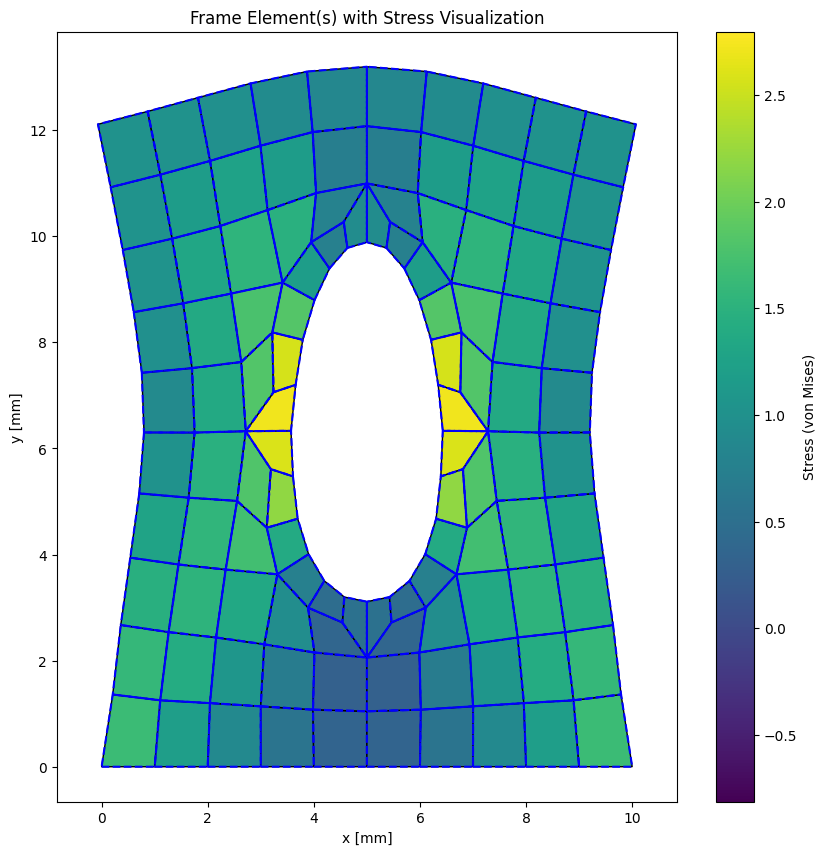

In [111]:
plotter = Plotter(solver)
plotter.plot_system()

In [96]:
reaction_forces = solver.get_reaction_forces()
reaction_forces = reaction_forces.reshape(-1, 2)

for node_id, (fx, fy) in enumerate(reaction_forces):
    reaction_forces_for_nodes = f"Node: {node_id}, FX: {fx:.4f} [N], FY: {fy:.4f} [N]"
    print(reaction_forces_for_nodes)

ic| reaction_forces_for_nodes: 'Node: 0, FX: -0.0805 [N], FY: -0.2609 [N]'
ic| reaction_forces_for_nodes: 'Node: 1, FX: -0.0257 [N], FY: -0.3550 [N]'
ic| reaction_forces_for_nodes: 'Node: 2, FX: 0.0009 [N], FY: -0.2693 [N]'
ic| reaction_forces_for_nodes: 'Node: 3, FX: 0.0220 [N], FY: -0.1924 [N]'
ic| reaction_forces_for_nodes: 'Node: 4, FX: 0.0213 [N], FY: -0.1245 [N]'
ic| reaction_forces_for_nodes: 'Node: 5, FX: -0.0000 [N], FY: -0.0958 [N]'
ic| reaction_forces_for_nodes: 'Node: 6, FX: -0.0213 [N], FY: -0.1245 [N]'
ic| reaction_forces_for_nodes: 'Node: 7, FX: -0.0220 [N], FY: -0.1924 [N]'
ic| reaction_forces_for_nodes: 'Node: 8, FX: -0.0009 [N], FY: -0.2693 [N]'
ic| reaction_forces_for_nodes: 'Node: 9, FX: 0.0257 [N], FY: -0.3550 [N]'
ic| reaction_forces_for_nodes: 'Node: 10, FX: 0.0805 [N], FY: -0.2609 [N]'


In [97]:
strains, stresses = solver.calculate_loads()

In [98]:
stresses.shape

(108, 3)